In [1]:
# autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys

import pathmagic
from tools.project import proj_dir

In [2]:
from tools.tools import load_tensor_image, load_blender_flow_exr, to_tensor_crop, load_tensor_depth
from tools.vis_tools import visualize_tensors, flow_to_vis, plot_tensor_grid

size = 256

#folder = "/home/kevin/Documents/master-thesis/datasets/s7_5ramp/train/seq0"

#imgs = [load_tensor_depth(os.path.join(folder, f"depth000{i}.exr"), size).cuda() for i in range(6)]
#flows = [to_tensor_crop(load_blender_flow_exr(os.path.join(folder, f"flow000{i}.exr")), size).cuda() for i in range(5)]

folder = "/home/kevin/Documents/master-thesis/datasets/s7_5ramp_flow/train/seq0"
imgs = [load_tensor_depth(os.path.join(folder, f"depth000{i}.exr"), size).cuda() for i in [0, 5]]
flows = [to_tensor_crop(load_blender_flow_exr(os.path.join(folder, f"flow_0to5_0000.exr")), size).cuda() for i in range(1)]


/home/kevin/miniconda2/envs/torch/lib/python3.6/site-packages/torch/cuda/__init__.py:118: UserWarning: 
    Found GPU0 GeForce GTX 660M which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability that we support is 3.5.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


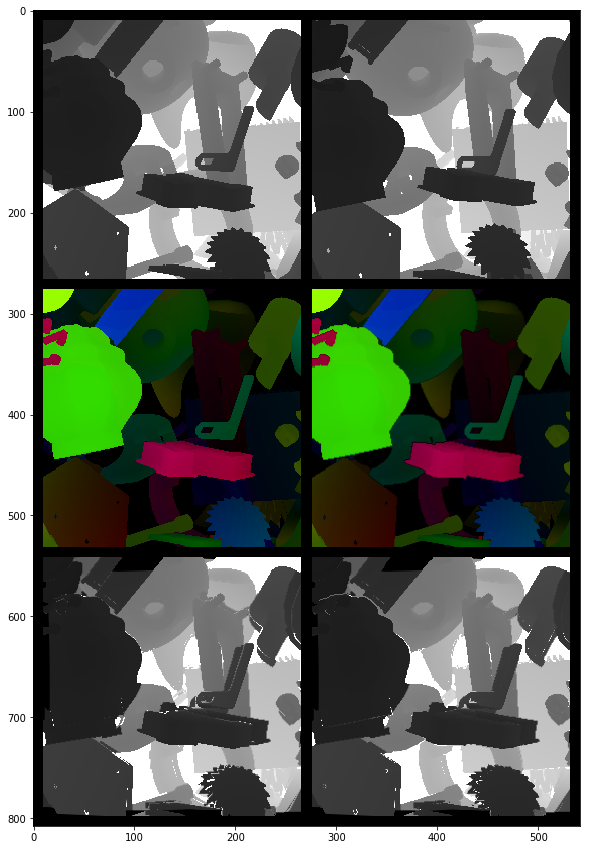

In [4]:
import torch
import matplotlib.pyplot as plt
from net.flownet2 import MultiWarp, FlowComposite, FlowTrajectory, Warp

warp = Warp()
multi_warp = MultiWarp(use_composite_flow=False)

flow_comp = FlowComposite()(torch.stack(flows).unsqueeze(0))[0]

img_warp = multi_warp(imgs[-1].unsqueeze(0), torch.stack(flows).unsqueeze(0))[0]
img_warp_comp = warp(imgs[-1].unsqueeze(0), flow_comp.unsqueeze(0))[0]

plt.figure(figsize=(15,15))
plot_tensor_grid(imgs + flows + [flow_comp] + [img_warp] + [img_warp_comp], nrow=len(imgs))